#### Keras Fashion Dataset Deep-Learning Neural Network

In [1]:
# import relevant libraries
import os
import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.axes as ax
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.optimize import curve_fit
from lmfit import Parameters, Model
import re
import seaborn as sns
import math
from datetime import datetime
# import the perceptron from sklearn
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

In [2]:
# import the keras fashion dataset
from tensorflow.keras.datasets import fashion_mnist

In [3]:
fashion_mnist = fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

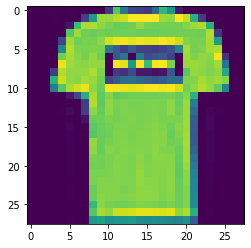

In [4]:
plt.imshow(X_train_full[1])

In [5]:
y_train_full[1]

0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [7]:
class_names[y_train_full[1]]

'T-shirt/top'

In [8]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

##### Data Normalization
Normalize the data dimensions so that they are of approximately the same scale

In [9]:
X_train_n = X_train_full / 255.
X_test_n  = X_test / 255.

#### Split the Data Into Train/Validation/Test Datasets
- **Training Data:** used for training the model
- **Validation Data:** used for tuning the hyperparameters and evaluate the models
- **Test Data:** used to test the model after the model has gone through initial vetting by the validation set.

In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

There are two main APIs for defining a model in Keras:
- Sequential Model API
- Functional API

In [11]:
# set the random seed
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()
# each pixel of the image is an imput
model.add(keras.layers.Flatten(input_shape=[28,28]))
# hidden layer 1
model.add(keras.layers.Dense(300,activation="relu"))
#hidden layer 2
model.add(keras.layers.Dense(100,activation="relu"))
# softmax activation
model.add(keras.layers.Dense(10,activation="softmax"))

In [13]:
# provide a model of the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


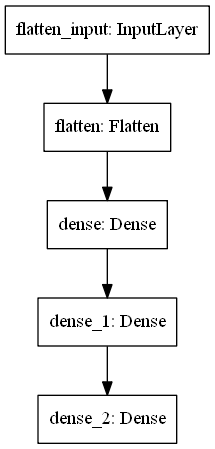

In [14]:
import pydot
keras.utils.plot_model(model)

Access the parameters usint the get_weight() method

In [15]:
weights, biases = model.layers[1].get_weights()

In [16]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [21]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4843 - accuracy: 0.8323 - val_loss: 0.4546 - val_accuracy: 0.8478
Epoch 3/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.4413 - accuracy: 0.8463 - val_loss: 0.4396 - val_accuracy: 0.8486
Epoch 4/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.4128 - accuracy: 0.8546 - val_loss: 0.4155 - val_accuracy: 0.8562
Epoch 5/30
55000/55000 [==============================] - 5s 85us/sample - loss: 0.3926 - accuracy: 0.8614 - val_loss: 0.3812 - val_accuracy: 0.8642
Epoch 6/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.3769 - accuracy: 0.8664 - val_loss: 0.3727 - val_accuracy: 0.8680
Epoch 7/30
55000/55000 [==============================] -

In [22]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [23]:
model_history.history

{'loss': [0.7225697039777582,
  0.4843224787755446,
  0.4412506365515969,
  0.412824481530623,
  0.3925637992295352,
  0.3769139765175906,
  0.3624008669333024,
  0.35160285770026123,
  0.34194327291575344,
  0.33252359673326665,
  0.3240769441431219,
  0.31599930385676295,
  0.3072553581324491,
  0.3017400986628099,
  0.2952222750988874,
  0.28974686973961916,
  0.28349404212344775,
  0.27837227577729656,
  0.2730784975008531,
  0.268142094540596,
  0.2634582347566431,
  0.257577385412563,
  0.25392633698636835,
  0.24923982545462522,
  0.24542631996761669,
  0.24091554515145042,
  0.23687009863745082,
  0.2322714460914785,
  0.2286633168426427,
  0.22560920379595323],
 'accuracy': [0.7641091,
  0.83230907,
  0.84632725,
  0.8546,
  0.86143637,
  0.8663818,
  0.87256366,
  0.8746909,
  0.87709093,
  0.88083637,
  0.8836727,
  0.8869454,
  0.89034545,
  0.8921818,
  0.8939273,
  0.8962909,
  0.8987091,
  0.89945453,
  0.90156364,
  0.9039818,
  0.90458184,
  0.90723634,
  0.90885454,
 

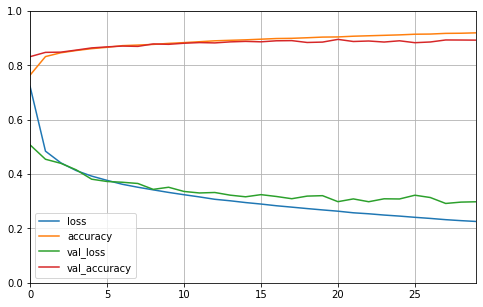

In [24]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
# evluaate the model with the test data
model.evaluate(X_test, y_test)
# outputs loss and accuracy

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3323 - accuracy: 0.8794


[0.3323081064462662, 0.8794]

In [27]:
# take the first three samples from the dataset for now, since no new data
X_new = X_test[:3]

In [28]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


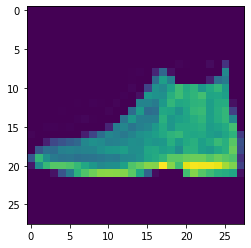

In [31]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


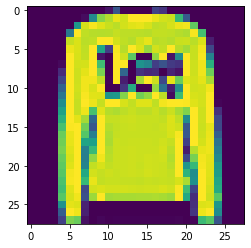

In [32]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


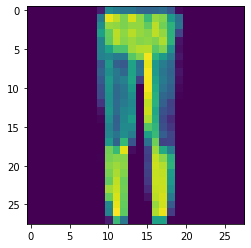

In [33]:
print(plt.imshow(X_test[3]))